<a href="https://colab.research.google.com/github/ansarifar407/12-days-of-biopython/blob/main/projec_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Shape of training images after preprocessing: (60000, 28, 28, 1)
Shape of test images after preprocessing: (10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.7430 - loss: 0.7039 - val_accuracy: 0.8662 - val_loss: 0.3690
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8633 - loss: 0.3792 - val_accuracy: 0.8845 - val_loss: 0.3136
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8773 - loss: 0.3279 - val_accuracy: 0.8928 - val_loss: 0.2898
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.8927 - loss: 0.2906 - val_accuracy: 0.8990 - val_loss: 0.2704
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8958 - loss: 0.2773 - val_accuracy: 0.9008 - val_loss: 0.2606
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9037 - loss: 0.2582 - val_accuracy: 0.9133 - val_loss: 0.2427
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9067 - loss: 0.2431 - val_accuracy: 0.9067 - val_loss: 0.2483
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8

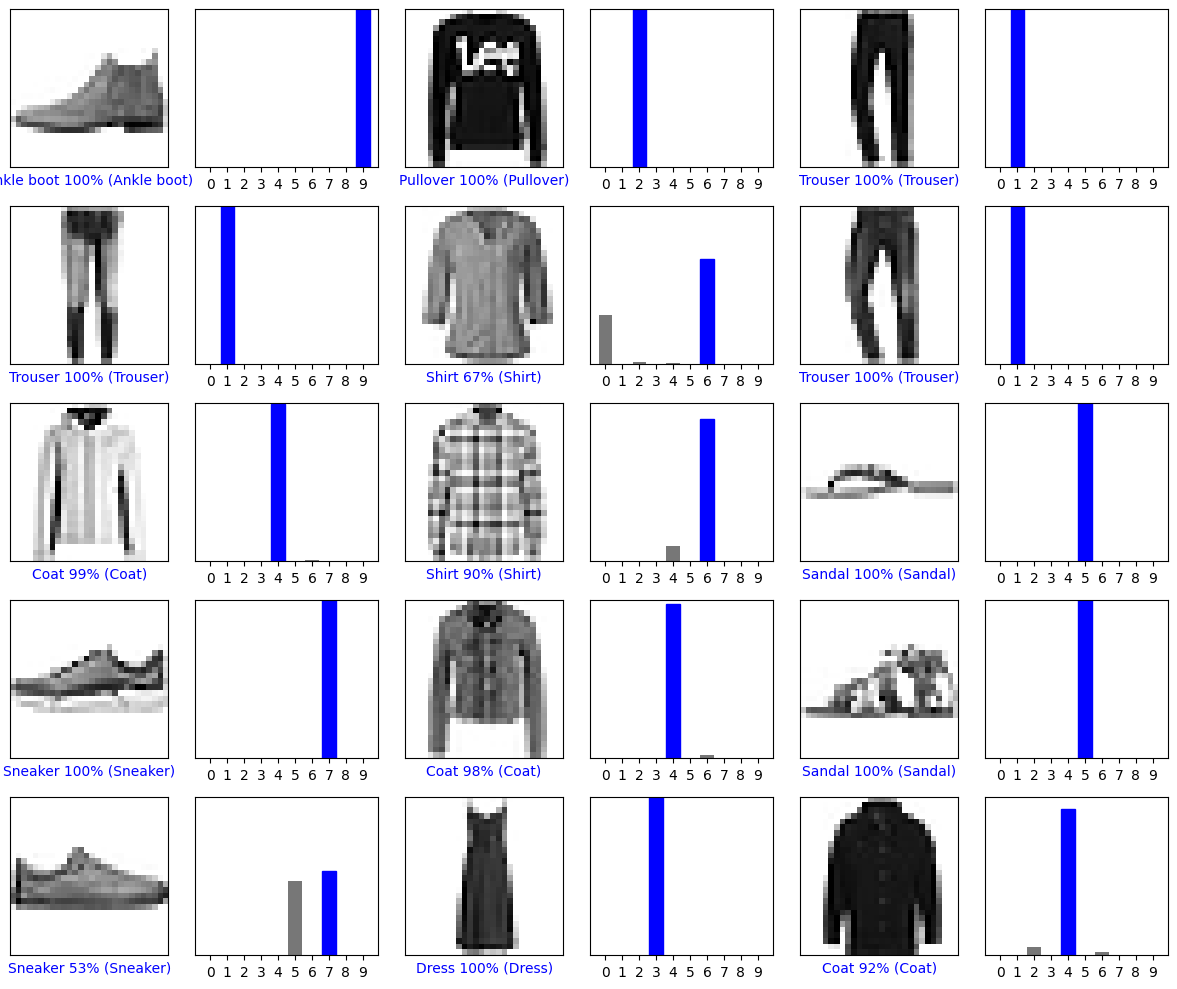

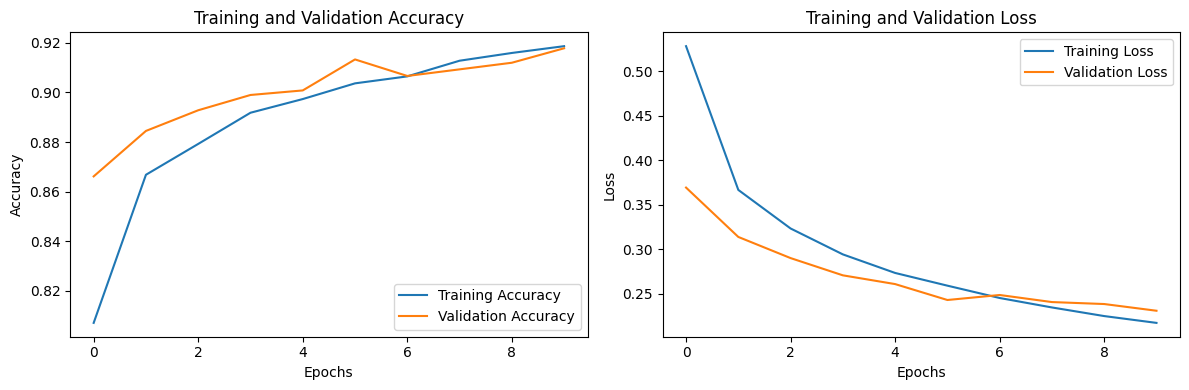

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# 2. بارگذاری و آماده‌سازی مجموعه داده Fashion-MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# تعریف نام کلاس‌ها برای نمایش در خروجی
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# 3. پیش‌پردازش داده‌ها
# نرمال‌سازی مقادیر پیکسل‌ها به بازه [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# از آنجایی که از لایه‌های کانولوشنی استفاده می‌کنیم، باید یک بعد برای کانال رنگ اضافه کنیم.
# (60000, 28, 28) -> (60000, 28, 28, 1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

print("Shape of training images after preprocessing:", train_images.shape)
print("Shape of test images after preprocessing:", test_images.shape)

# 4. ساخت مدل شبکه عصبی کانولوشنی (CNN)
model = keras.Sequential([
    # لایه کانولوشنی اول
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # لایه کانولوشنی دوم
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # تبدیل نقشه‌های ویژگی به بردار
    keras.layers.Flatten(),

    # اضافه کردن Dropout برای جلوگیری از overfitting
    keras.layers.Dropout(0.5),

    # لایه تماماً متصل
    keras.layers.Dense(128, activation='relu'),

    # لایه خروجی
    keras.layers.Dense(10, activation='softmax')
])

# نمایش خلاصه معماری مدل
model.summary()

# 5. کامپایل کردن مدل
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. آموزش مدل
print("\n--- Starting Model Training ---")
try:
    history = model.fit(
        train_images,
        train_labels,
        epochs=10,
        validation_split=0.1,
        batch_size=32,
        verbose=1
    )
    print("--- Model Training Finished ---\n")
except Exception as e:
    print(f"Error during training: {e}")
    exit()

# 7. ارزیابی دقت مدل روی مجموعه آزمون
print("--- Evaluating Model on Test Data ---")
try:
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc:.4f}')
    print(f'Test loss: {test_loss:.4f}')
except Exception as e:
    print(f"Error during evaluation: {e}")

# 8. انجام پیش‌بینی و مصورسازی نتایج

# گرفتن پیش‌بینی‌ها برای کل داده‌های آزمون
try:
    predictions = model.predict(test_images[:100])  # فقط 100 نمونه اول برای سرعت بیشتر
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

# تابعی برای نمایش یک تصویر، برچسب پیش‌بینی‌شده و برچسب واقعی
def plot_image(i, predictions_array, true_label, img):
    if i >= len(true_label) or i >= len(img):
        return

    true_label_val, img_val = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # اگر تصویر 3 بعدی است، آن را 2 بعدی کنیم
    if len(img_val.shape) == 3:
        img_val = img_val.squeeze()

    plt.imshow(img_val, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label_val:
        color = 'blue'
    else:
        color = 'red'

    confidence = 100 * np.max(predictions_array)
    plt.xlabel(f"{class_names[predicted_label]} {confidence:2.0f}% ({class_names[true_label_val]})",
               color=color)

# تابعی برای نمایش نمودار میله‌ای احتمالات پیش‌بینی
def plot_value_array(i, predictions_array, true_label):
    if i >= len(true_label):
        return

    true_label_val = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label_val].set_color('blue')

# نمایش چند نمونه از نتایج
num_rows = 5
num_cols = 3
num_images = min(num_rows * num_cols, len(predictions))

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

# رسم نمودار دقت و زیان در طول آموزش
if 'history' in locals():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()
else:
    print("Training history not available for plotting.")